Vitor Emanuel da Silva Rozeno
RA: 211044539

# Titanic dataset

### Pré-processamento de dados, classificação e avaliação

In [291]:
# importanto bibliotecas
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [292]:
warnings.filterwarnings("ignore") # ignorar alguns warnings que aparecem na regressão logística

In [293]:
# Leitura dos arquivos
train_data = pd.read_csv("/content/train.csv") # conjunto de treino
test_data = pd.read_csv("/content/test.csv") # conjunto de teste
gender_data = pd.read_csv("/content/gender_submission.csv") # conjunto apenas de exemplo para submissão no desafio do kaggle

In [294]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [296]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [297]:
train_data.shape

(891, 12)

In [298]:
# Valores faltantes
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [299]:
data = [train_data, test_data] # trabalhando com os dois conjuntos

for df in data:
    # valores faltantes da idade <- mediana
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Remover a coluna 'Cabin' devido à alta quantidade de dados ausentes
    # e Name, Id e Ticket por não serem de grande relevância para a classificação
    df.drop(columns=['Cabin','Name', 'PassengerId', 'Ticket'], inplace=True)

    # Preencher valores ausentes da coluna 'Embarked' com o valor mais frequente
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [300]:
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [301]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [302]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [303]:
# One-Hot Encoding para Sex e Embarked
# Para que assim variáveis qualitativas sejam quantitativas
# e não haja viés na classificação
train_data = pd.get_dummies(train_data, columns=['Embarked','Sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked','Sex'], drop_first=True)

In [304]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,True,False,True
1,3,47.0,1,0,7.0000,False,True,False
2,2,62.0,0,0,9.6875,True,False,True
3,3,27.0,0,0,8.6625,False,True,True
4,3,22.0,1,1,12.2875,False,True,False


A partir desse ponto, percebi que o conjunto de teste fornecido pelo kaggle não possui a váriavel alvo. Portanto,
para que fosse possível realizar as validações, passo a trabalhar apenas com o conjunto de treino, que será dividido.

In [305]:
#Separando features da variável alvo, em ambos conjuntos
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
# Modelo Random Forest - parâmetros default
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [308]:
# Avaliação
print("Random Forest - Default")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precisão: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")

Random Forest - Default
Acurácia: 0.8156424581005587
Precisão: 0.7887323943661971
Recall: 0.7567567567567568


In [309]:
# Regressão Logística - parâmetros default
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [310]:
# Avaliação
print("Regressão Logística - Default")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precisão: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")

Regressão Logística - Default
Acurácia: 0.7988826815642458
Precisão: 0.7714285714285715
Recall: 0.7297297297297297


Random Forest - 5 árvores
Acurácia: 0.776536312849162


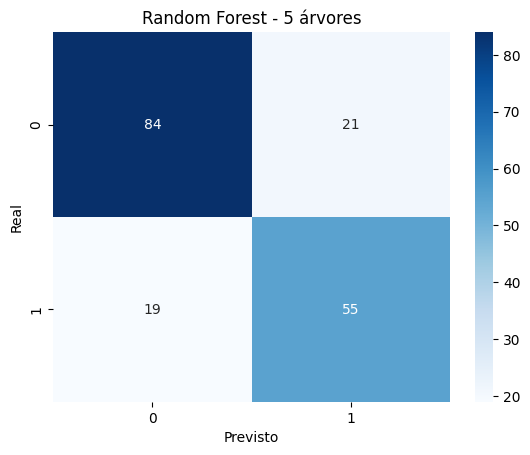




Random Forest - 50 árvores
Acurácia: 0.8100558659217877


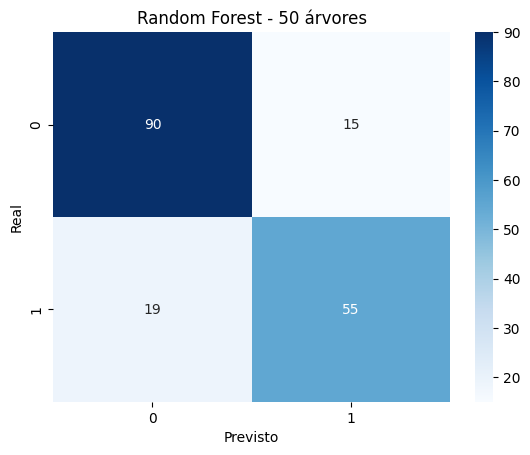




Random Forest - 250 árvores
Acurácia: 0.8156424581005587


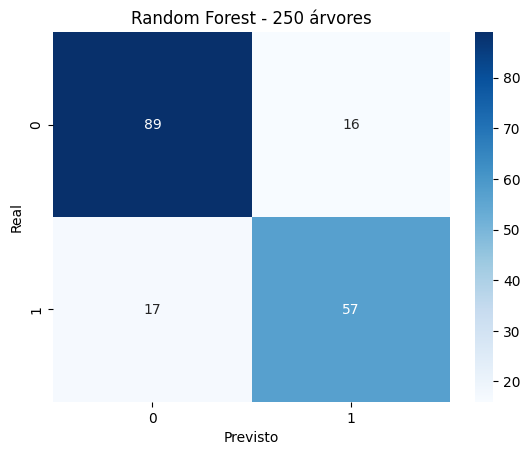

In [311]:
# testando diferentes quantidades de árvores
for n_estimators in [5, 50, 250]:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print(f"Random Forest - {n_estimators} árvores")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_rf)}")

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Random Forest - {n_estimators} árvores')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print('\n\n')

Regressão Logística - C=0.01
Acurácia: 0.7262569832402235



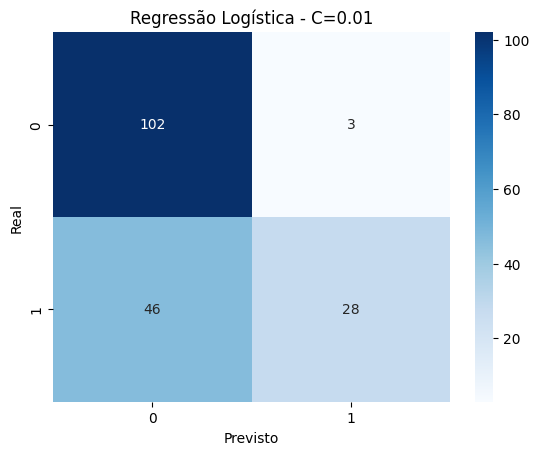




Regressão Logística - C=0.1
Acurácia: 0.8044692737430168



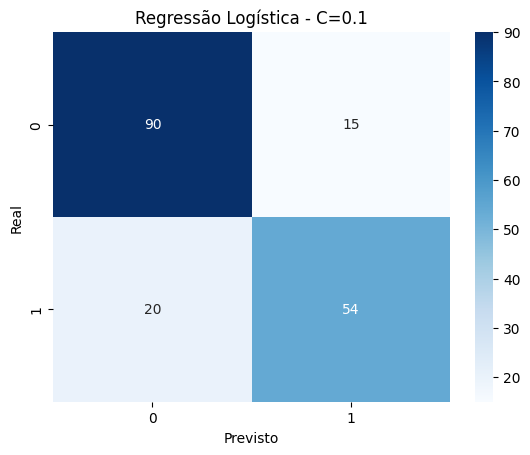




Regressão Logística - C=1
Acurácia: 0.7988826815642458



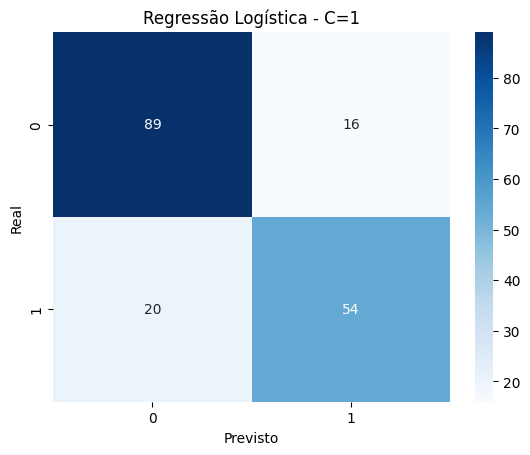

In [312]:
# testando diferentes valores de C (regularização) / evitar overfitting
for C in [0.01, 0.1, 1]:
    lr = LogisticRegression(C=C, random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print(f"Regressão Logística - C={C}")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_lr)}\n")

     # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Regressão Logística - C={C}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print('\n\n')